### Levitus et al. (2012) pentad question

In [1]:
base = '/g/data/e14/mv7494/access-om2/archive/025deg_jra55_iaf/'
save = '/g/data/e14/mv7494/HeatDist_figures/'

import xarray as xr # for working with labelled multi-dimensional arrays                                                                
import numpy as np # for numerical operations                                                           
import cmocean as cm
from datetime import datetime # package for printing time in plot                                       
import string # for subplot annotation                                                                  
import matplotlib.pyplot as plt # for matlab-like plotting                                              
import cartopy.crs as ccrs # for maps     
import itertools
import cosima_cookbook as cc
import pandas as pd
from matplotlib import gridspec
from cdo import *
cdo = Cdo()
import os
import sys
import warnings
warnings.filterwarnings('ignore') # suppress warnings
from matplotlib import ticker
import nc_time_axis
import cftime
import cartopy.mpl.ticker as cticker
import string # for subplot annotation
import cartopy.feature as cfeature
from matplotlib import gridspec
import bottleneck as bn # for time series moving average


#import warnings
#warnings.filterwarnings('ignore') # suppress warnings

import nc_time_axis
import cftime

# for displaying multiple output in one cell
from IPython.display import display as dp

# colours                                                                                               
ned_blue = [.12,.27,.54] # blue colour from the Dutch flag                                              
ned_red  = [.68,.10,.15] # red  "    "    "    "    "    "

from dask.distributed import Client
client = Client(n_workers=4)         # careful: do not run with 48 workers here as it will crash
client

Client Scheduler: tcp://127.0.0.1:36343 Dashboard: /proxy/44217/status,Cluster Workers: 4 Cores: 16 Memory: 68.72 GB


CPU times: user 133 ms, sys: 66.1 ms, total: 199 ms
Wall time: 482 ms


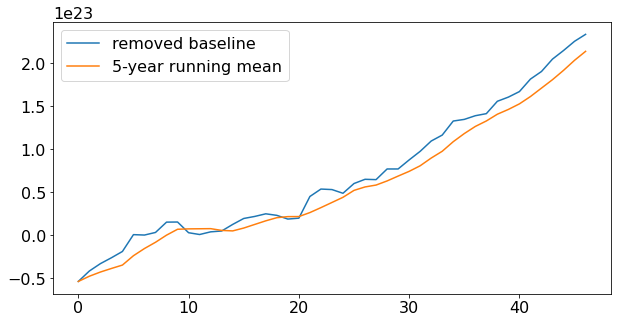

In [12]:
%%time
# (2) load Levitus et al., 2012 0-2000 m observed OHC -> calculate 5-month running mean
levitus = xr.open_dataset('/g/data/e14/mv7494/heat_content_anomaly_0-2000_pentad.nc',decode_times=False).pent_h22_WO.dropna('time')*1e22
levitus = levitus[13:-1] # select data from 1972 to 2017
levitus = levitus - np.mean(levitus)

fig= plt.figure(figsize=(10, 5)); ax1 = plt.subplot(1,1,1)
levitus = levitus - np.mean(levitus[0:20])
plt.plot(levitus, label='removed baseline')
levitus = bn.move_mean(levitus, window=5, min_count=1)
plt.plot(levitus, label='5-year running mean'); plt.legend(fontsize=16)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
ax1.yaxis.offsetText.set_fontsize(16); plt.title('WOA Ocean Heat Content Anomalies, 0-2000 m')

In [16]:
levitus = xr.open_dataset('/g/data/e14/mv7494/heat_content_anomaly_0-2000_pentad.nc',decode_times=False)
levitus

<xarray.Dataset>
Dimensions:             (depth: 1, lat: 180, lon: 360, nbounds: 2, time: 61)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 30.0 42.0 54.0 66.0 ... 726.0 738.0 750.0
Dimensions without coordinates: depth, nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    pent_h22_WO         (time) float32 ...
    pent_h22_se_WO      (time) float32 ...
    pent_h22_NH         (time) float32 ...
    pent_h22_se_NH      (time) float32 ...
    pent_h22_SH         (time) float32 ...
    pent_h22_se_SH      (time) float32 ...
    pent_h22_AO         (time) float32 ...
    pent_h22_se_AO      (time) float32 ...
    pent_h22_NA         (time) float32 ...
    pent_h22_se_NA      (time) float32 ...
    pent_h22_SA         (time) float32 ...
    pent_h22_se_SA      (time) float32 ...
    pent_h22_PO         (time) float32 ...
    pent_h22_se_PO      (time) float32 ...
    pent_h22_NP         (time) float32 ...
    pent_h22_se_NP      (time) float32 ...
    pent_h22_SP         (time) float32 ...
    pent_h22_se_SP      (time) float32 ...
    pent_h22_IO         (time) float32 ...
    pent_h22_se_IO      (time) float32 ...
    pent_h22_NI         (time) float32 ...
    pent_h22_se_NI      (time) float32 ...
    pent_h22_SI         (time) float32 ...
    pent_h22_se_SI      (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    id:                              heat_content_anomaly_0-2000_pentad.nc
    naming_authority:                gov.noaa.nodc
    time_coverage_start:             1955-01-01
    time_coverage_duration:          P65Y
    time_coverage_resolution:        P05Y
    geospatial_lat_min:              -90.0
    geospatial_lat_max:              90.0
    geospatial_lon_min:              -180.0
    geospatial_lon_max:              180.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         2000.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       1.00 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       1.00 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NODC.Services@noaa.gov
    creator_url:                     http://www.nodc.noaa.gov
    project:                         World Ocean Database
    processing_level:                processed
    keywords:                        <ISO_TOPIC_Category> Oceans</ISO_TOPIC_C...
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF-1.6
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of anomalies
    featureType:                     Grid
    cdm_data_type:                   Grid
    nodc_template_version:           NODC_NetCDF_Grid_Template_v1.0
    date_created:                    2020-03-15 
    date_modified:                   2020-03-15 
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www